In [1]:
import os
import pandas as pd
import numpy as np
import random
import gc
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

np.random.seed(2019)
random.seed(2019)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 280)
pd.set_option('display.max_colwidth', 150)
data_path = '/data/workspace/kimi/tencent_ads/2020/dataset'

In [2]:
clk_df = pd.read_csv(f'{data_path}/train_preliminary/click_log.csv' )
print(clk_df)
del clk_df

          time  user_id  creative_id  click_times
0            9    30920       567330            1
1           65    30920      3072255            1
2           56    30920      2361327            1
3            6   309204       325532            1
4           59   309204      2746730            1
5           12   309204       726402            1
6           79   309204      2851451            1
7           32   309204      1569716            1
8            5   309204        71956            1
9            8   309204       322354            1
10           8   309204       118351            1
11          10   309204       580576            1
12          40   309204        98510            1
13          13   309204       819237            1
14           7   309204       336926            1
15          14   309204       819237            1
16          12   309204       623579            1
17          27   309204      1413507            1
18          55   309204      2634847            1


In [3]:
user_df = pd.read_csv(f'{data_path}/train_preliminary/user.csv' )
print(user_df)
del user_df

        user_id  age  gender
0             1    4       1
1             2   10       1
2             3    7       2
3             4    5       1
4             5    4       1
5             6    6       1
6             7    6       2
7             8    5       1
8             9    5       1
9            10    9       2
10           11    8       2
11           12    5       1
12           13    6       2
13           14    7       1
14           15    5       2
15           16    3       2
16           17    3       1
17           18    2       2
18           19    3       1
19           20    4       1
20           21    6       2
21           22    4       1
22           23    5       2
23           24    1       2
24           25    6       2
...         ...  ...     ...
899975   899976    4       2
899976   899977    3       2
899977   899978    6       1
899978   899979    2       2
899979   899980    4       1
899980   899981    2       2
899981   899982    2       1
899982   89998

In [4]:
ad_df = pd.read_csv(f'{data_path}/train_preliminary/ad.csv' )
print(ad_df)


         creative_id    ad_id product_id  product_category  advertiser_id industry
0                  1        1         \N                 5            381       78
1                  4        4         \N                 5            108      202
2                  7        7         \N                 5            148      297
3                  8        8         \N                 5            713      213
4                  9        9         \N                 5            695      213
5                 10       10         \N                 5            100       73
6                 12       12         \N                 5            765        6
7                 13       13         \N                 5            113      267
8                 16       16         \N                 5            623        1
9                 20       20      34647                 5            312      267
10                21       21         \N                 5            108      202
11  

326
247    262634
319    178677
6      161962
322    159928
\N     101048
242     77113
238     76788
326     65196
54      64318
73      64130
Name: industry, dtype: int64
null:101048


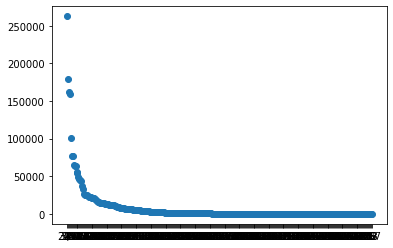

In [7]:
adv_count_value= ad_df['industry'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

del adv_count_value

52090
14681    26906
14056    24500
14682    18915
9058     12127
32876     8633
22897     8336
15855     8164
24894     5864
25260     5789
10988     5761
Name: advertiser_id, dtype: int64
null:101048


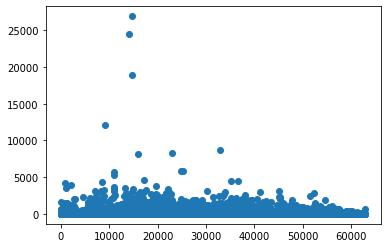

In [9]:
adv_count_value= ad_df['advertiser_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

del adv_count_value

18
2     923994
18    663346
3     283817
8     233832
5     227970
13     38072
17     35638
4      22917
12     19592
6      12077
7       7611
16      7216
9       2970
11      1379
15       332
1        259
14        95
10        18
Name: product_category, dtype: int64
null:101048


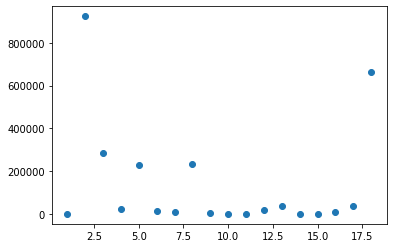

In [12]:
adv_count_value= ad_df['product_category'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:20])
#null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

del adv_count_value

In [14]:
adv_count_value= ad_df['product_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
#x = adv_count_value.index
#y = adv_count_value.values
#plt.scatter(x,y)
#plt.show()

del adv_count_value

33273
\N      929524
23       37705
1766     33103
1674     32395
1064     30665
136      29479
1810     25195
111      23236
1261     21242
1334     21185
Name: product_id, dtype: int64
null:929524


In [16]:
adv_count_value= ad_df['ad_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
# x = adv_count_value.index
# y = adv_count_value.values
# plt.scatter(x,y)
# plt.show()

del adv_count_value

2264190
1729961    19
2179954    18
1771929    17
2763747    17
3718339    16
681564     16
847568     16
926023     16
3288857    16
1779604    16
Name: ad_id, dtype: int64


In [17]:
ad_test_df = pd.read_csv(f'{data_path}/test/ad.csv' )
print(ad_test_df)

         creative_id    ad_id product_id  product_category  advertiser_id industry
0                  1        1         \N                 5            381       78
1                  3        3         \N                 5            598      165
2                  4        4         \N                 5            108      202
3                  5        5         \N                 5            109        6
4                  6        6         \N                 5            400        6
5                  7        7         \N                 5            148      297
6                 10       10         \N                 5            100       73
7                 13       13         \N                 5            113      267
8                 14       14         \N                 5            556        2
9                 16       16         \N                 5            623        1
10                17       17         \N                 5            623        1
11  